In [50]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

pd.set_option('mode.chained_assignment', None)

In [51]:
#constants

data_file = 'processed_data_2.csv'

In [52]:
data = pd.read_csv(data_file, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [53]:
data.groupby(by='class').count()

,v0,v1,v2,a0,a1,a2,max(a),min(a),avg(a),var(a),max(v),min(v),avg(v),var(v),brngChng
class,,,,,,,,,,,,,,,
bike,79307,79307,79307,79307,79307,79307,79307,79307,79307,79307,79307,79307,79307,79307,79307
bus,30903,30903,30903,30903,30903,30903,30903,30903,30903,30903,30903,30903,30903,30903,30903
car,214843,214843,214843,214843,214843,214843,214843,214843,214843,214843,214843,214843,214843,214843,214843
train,12571,12571,12571,12571,12571,12571,12571,12571,12571,12571,12571,12571,12571,12571,12571
walk,145433,145433,145433,145433,145433,145433,145433,145433,145433,145433,145433,145433,145433,145433,145433


In [54]:
data['class'].unique()

used_classes = ['car', 'walk', 'bike', 'train']

data = data.drop(data[~data['class'].isin(used_classes)].index)

In [55]:
#data['class'][data['class'] != 'car'] = 'not-car'
data['class'].unique()

array(['car', 'walk', 'bike', 'train'], dtype=object)

In [56]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [57]:
xg_reg = xgb.XGBClassifier(objective ='multi:softprob', colsample_bytree = 1, learning_rate = 0.5,
                max_depth = 10, n_estimators = 5)

xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=5,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [58]:
from sklearn.metrics import classification_report
preds = xg_reg.predict(X_test)
print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds, labels=['car', 'walk', 'bike', 'train']))

              precision    recall  f1-score   support

        bike       0.74      0.64      0.69     16010
         car       0.87      0.73      0.79     42866
       train       0.78      0.43      0.55      2432
        walk       0.66      0.89      0.76     29123

    accuracy                           0.76     90431
   macro avg       0.76      0.67      0.70     90431
weighted avg       0.78      0.76      0.76     90431

0.7573730247370923
[[31244  9282  2059   281]
 [ 1651 25946  1525     1]
 [ 1856  3882 10260    12]
 [ 1124   206    62  1040]]


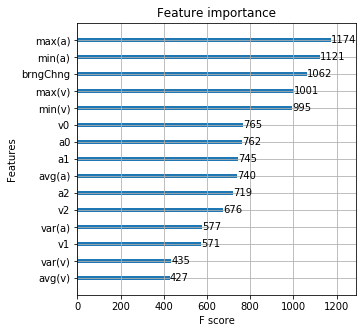

In [59]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [60]:
preds = xg_reg.predict_proba(X_test)

In [61]:
print(preds)

[[0.1455979  0.24601504 0.05839564 0.5499914 ]
 [0.5913462  0.30796996 0.0459571  0.05472669]
 [0.02274677 0.9269895  0.02753926 0.02272442]
 ...
 [0.02193244 0.90013826 0.05601842 0.02191089]
 [0.02299209 0.9273373  0.02670111 0.0229695 ]
 [0.09064145 0.56867695 0.04908528 0.29159632]]
